In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
import pickle
import torch
import torch.nn.functional as F
import scipy.constants as C
from ase import units
from schnetpack.datasets import QM9
import dgl
import sklearn
from ase.visualize import view
from plotnine import *

Using backend: pytorch


In [2]:
qm9data = QM9(dbpath='./qm9.db', download=False)
num_mol = len(qm9data) # 133885
print('e.g. molecular-1:')
qm9data[0]

e.g. molecular-1:


{'rotational_constant_A': tensor([157.7118]),
 'rotational_constant_B': tensor([157.7100]),
 'rotational_constant_C': tensor([157.7070]),
 'dipole_moment': tensor([0.]),
 'isotropic_polarizability': tensor([1.9575]),
 'homo': tensor([-10.5499]),
 'lumo': tensor([3.1865]),
 'gap': tensor([13.7363]),
 'electronic_spatial_extent': tensor([9.9030]),
 'zpve': tensor([1.2177]),
 'energy_U0': tensor([-1101.4878]),
 'energy_U': tensor([-1101.4098]),
 'enthalpy_H': tensor([-1101.3840]),
 'free_energy': tensor([-1102.0229]),
 'heat_capacity': tensor([6.4690]),
 '_atomic_numbers': tensor([6, 1, 1, 1, 1]),
 '_positions': tensor([[-2.8340e-06,  2.3050e-06, -1.4378e-07],
         [ 1.4846e-02, -1.0918e+00, -6.0250e-03],
         [ 1.0244e+00,  3.7795e-01, -7.7246e-03],
         [-5.2812e-01,  3.6172e-01, -8.8464e-01],
         [-5.1112e-01,  3.5213e-01,  8.9840e-01]]),
 '_cell': tensor([[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]),
 '_neighbors': tensor([[1, 2, 3, 4],
         [0, 2,

In [4]:
jiawan_id = 0
molecular, properties = qm9data.get_properties(jiawan_id)
print('甲烷分子示意图：')
view(molecular,viewer='x3d')

In [7]:

# loss_func = F.mse_loss

In [3]:
names_prop = list(qm9data[0].keys())

In [47]:
aaa = torch.tensor([vallues_prop[i] for i in range(15)] + list(vallues_prop[15]) + list(vallues_prop[16].flatten()) + list(vallues_prop[18].flatten()))

In [18]:
num_part = int(num_mol/1000)
qm9ts = torch.stack([torch.tensor([list(qm9data[i].values())[j] for j in range(15)]) for i in range(num_part)])
qm9np = qm9ts.numpy()

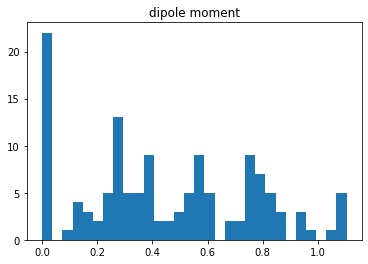

In [19]:
plt.hist(qm9np[:,3], bins=30)
plt.title('dipole moment')
plt.show()

In [23]:
qm9ts[0]

tensor([  157.7118,   157.7100,   157.7070,     0.0000,     1.9575,   -10.5499,
            3.1865,    13.7363,     9.9030,     1.2177, -1101.4878, -1101.4098,
        -1101.3840, -1102.0229,     6.4690])

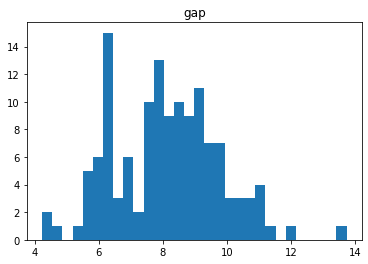

In [25]:
plt.hist(qm9np[:,7], bins=30)
plt.title('gap')
plt.show()


In [9]:
qm9data[0]

{'rotational_constant_A': tensor([157.7118]),
 'rotational_constant_B': tensor([157.7100]),
 'rotational_constant_C': tensor([157.7070]),
 'dipole_moment': tensor([0.]),
 'isotropic_polarizability': tensor([1.9575]),
 'homo': tensor([-10.5499]),
 'lumo': tensor([3.1865]),
 'gap': tensor([13.7363]),
 'electronic_spatial_extent': tensor([9.9030]),
 'zpve': tensor([1.2177]),
 'energy_U0': tensor([-1101.4878]),
 'energy_U': tensor([-1101.4098]),
 'enthalpy_H': tensor([-1101.3840]),
 'free_energy': tensor([-1102.0229]),
 'heat_capacity': tensor([6.4690]),
 '_atomic_numbers': tensor([6, 1, 1, 1, 1]),
 '_positions': tensor([[-2.8340e-06,  2.3050e-06, -1.4378e-07],
         [ 1.4846e-02, -1.0918e+00, -6.0250e-03],
         [ 1.0244e+00,  3.7795e-01, -7.7246e-03],
         [-5.2812e-01,  3.6172e-01, -8.8464e-01],
         [-5.1112e-01,  3.5213e-01,  8.9840e-01]]),
 '_cell': tensor([[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]),
 '_neighbors': tensor([[1, 2, 3, 4],
         [0, 2,

In [13]:
offsets = [torch.sum(qm9data[i]['_cell_offset']) for i in range(1000)]
cells = [torch.sum(qm9data[i]['_cell']) for i in range(1000)]

In [26]:
names_prop

['rotational_constant_A',
 'rotational_constant_B',
 'rotational_constant_C',
 'dipole_moment',
 'isotropic_polarizability',
 'homo',
 'lumo',
 'gap',
 'electronic_spatial_extent',
 'zpve',
 'energy_U0',
 'energy_U',
 'enthalpy_H',
 'free_energy',
 'heat_capacity',
 '_atomic_numbers',
 '_positions',
 '_cell',
 '_neighbors',
 '_cell_offset',
 '_idx']

[tensor([157.7118]),
 tensor([157.7100]),
 tensor([157.7070]),
 tensor([0.]),
 tensor([1.9575]),
 tensor([-10.5499]),
 tensor([3.1865]),
 tensor([13.7363]),
 tensor([9.9030]),
 tensor([1.2177]),
 tensor([-1101.4878]),
 tensor([-1101.4098]),
 tensor([-1101.3840]),
 tensor([-1102.0229]),
 tensor([6.4690]),
 tensor([6, 1, 1, 1, 1]),
 tensor([[-2.8340e-06,  2.3050e-06, -1.4378e-07],
         [ 1.4846e-02, -1.0918e+00, -6.0250e-03],
         [ 1.0244e+00,  3.7795e-01, -7.7246e-03],
         [-5.2812e-01,  3.6172e-01, -8.8464e-01],
         [-5.1112e-01,  3.5213e-01,  8.9840e-01]]),
 tensor([[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]),
 tensor([[1, 2, 3, 4],
         [0, 2, 3, 4],
         [0, 1, 3, 4],
         [0, 1, 2, 4],
         [0, 1, 2, 3]]),
 tensor([[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
      